# MetricLoss を求める関数を考える

In [49]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import math
# setting learning schedul
from torch.optim.lr_scheduler import LambdaLR
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
from torch_geometric.nn import GCNConv

polygon: <__main__.Data object at 0x7fb1b44c7cd0>


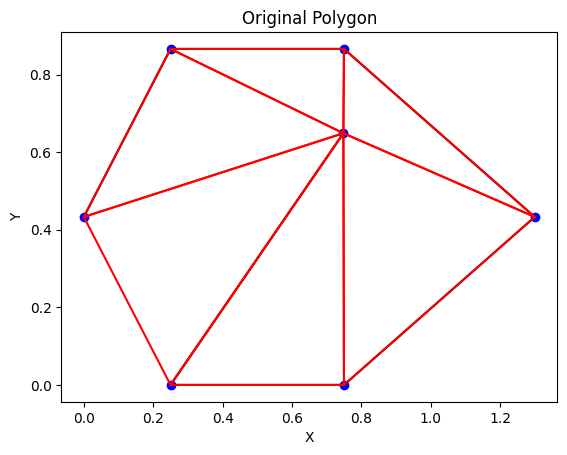

In [44]:
class Data:
    def __init__(self, vertices, faces):
        self.vertices = vertices
        self.faces = faces

def create_data():
    random_number_x = random.random()
    random_number_y = random.random()
    root_3 = torch.sqrt(torch.tensor(3.))
    vertices = torch.tensor([[random_number_x, random_number_y], [0.25, 0], [0.75, 0], [1.3, 0.25*root_3], [0.75, 0.5*root_3], [0.25, 0.5*root_3], [0, 0.25*root_3]], dtype=torch.float64)
    faces = torch.tensor([[1, 2, 0], [2, 3, 0], [3, 4, 0], [4, 5, 0], [5, 6, 0], [6, 1, 0]])

    polygon = Data(vertices, faces)
    # print(polygon)
    return polygon

def plot_mesh(vertices, faces, title):
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # 描画するメッシュの頂点をプロット
    ax.plot(vertices[:,0], vertices[:,1], 'bo')  # 頂点を青色の点でプロット
    ax.plot(vertices[:,0], vertices[:,1], 'k-')  # 辺を黒色の線でプロット

    # 各三角形をプロット
    for face in faces:
        v0, v1, v2 = vertices[face]
        ax.plot([v0[0], v1[0], v2[0], v0[0]], [v0[1], v1[1], v2[1], v0[1]], 'r-')  # 三角形を赤色の線でプロット

    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    plt.show()

polygon = create_data()
print("polygon:", polygon)
# オリジナルのメッシュをプロット
plot_mesh(polygon.vertices, polygon.faces, title="Original Polygon")

In [45]:
def select_vertices(vertices, face):
    v0 = vertices[face[0]]
    v1 = vertices[face[1]]
    v2 = vertices[face[2]]
    return v0, v1, v2 

def edge_length(v0, v1, v2):
    l1 = torch.sqrt((v0[0] - v1[0])**2 + (v0[1] - v1[1])**2)
    l2 = torch.sqrt((v1[0] - v2[0])**2 + (v1[1] - v2[1])**2)
    l3 = torch.sqrt((v2[0] - v0[0])**2 + (v2[1] - v0[1])**2)

    return l1, l2, l3

def face_area(l1, l2, l3):
    s = (l1 + l2 + l3)/2
    face_area = torch.sqrt(s*(s-l1)*(s-l2)*(s-l3))
    return face_area

def compute_loss(vertices, face):
    v0, v1, v2 = select_vertices(vertices, face)
    l1, l2, l3 = edge_length(v0, v1, v2)
    s = face_area(l1, l2, l3)

    q = (l1**2 + l2**2 + l3**2)/(4.0*torch.sqrt(torch.tensor(3.))*s)
    q = q.clone().detach().requires_grad_(True)
    return 1-1/q

In [46]:
loss = 0 
for face in polygon.faces:
    loss = loss + compute_loss(polygon.vertices, face)
    print(loss)
    
metric_loss = ((loss/(len(polygon.vertices[:,0])-1)).clone().detach().requires_grad_(True))
print(metric_loss)

tensor(0.1615, dtype=torch.float64, grad_fn=<AddBackward0>)
tensor(0.1799, dtype=torch.float64, grad_fn=<AddBackward0>)
tensor(0.7110, dtype=torch.float64, grad_fn=<AddBackward0>)
tensor(1.0761, dtype=torch.float64, grad_fn=<AddBackward0>)
tensor(1.2639, dtype=torch.float64, grad_fn=<AddBackward0>)
tensor(1.4057, dtype=torch.float64, grad_fn=<AddBackward0>)
tensor(0.2343, dtype=torch.float64, requires_grad=True)
